<a href="https://colab.research.google.com/github/kushal-gohel/Tasks/blob/main/Day_4_Day_5_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable DIffusion Tasks

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

In [ ]:
# Install required libraries
!pip install diffusers transformers accelerate --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
!pip install -U diffusers

### Trial Code

In [ ]:
model_id = "sd-legacy/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "Driver wearing uniform sitting idle"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

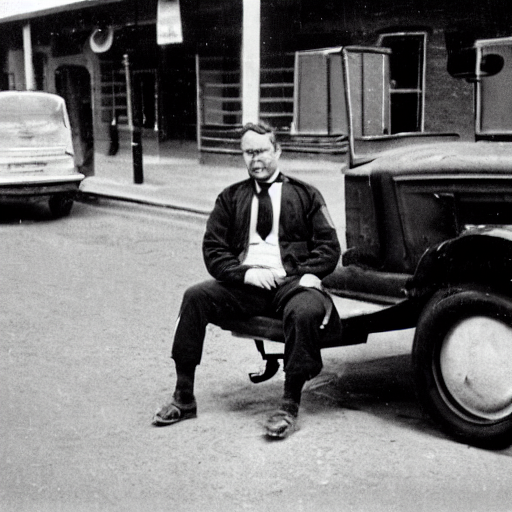

In [ ]:
image

### Stable Diffusion as per instructions using negative prompting

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

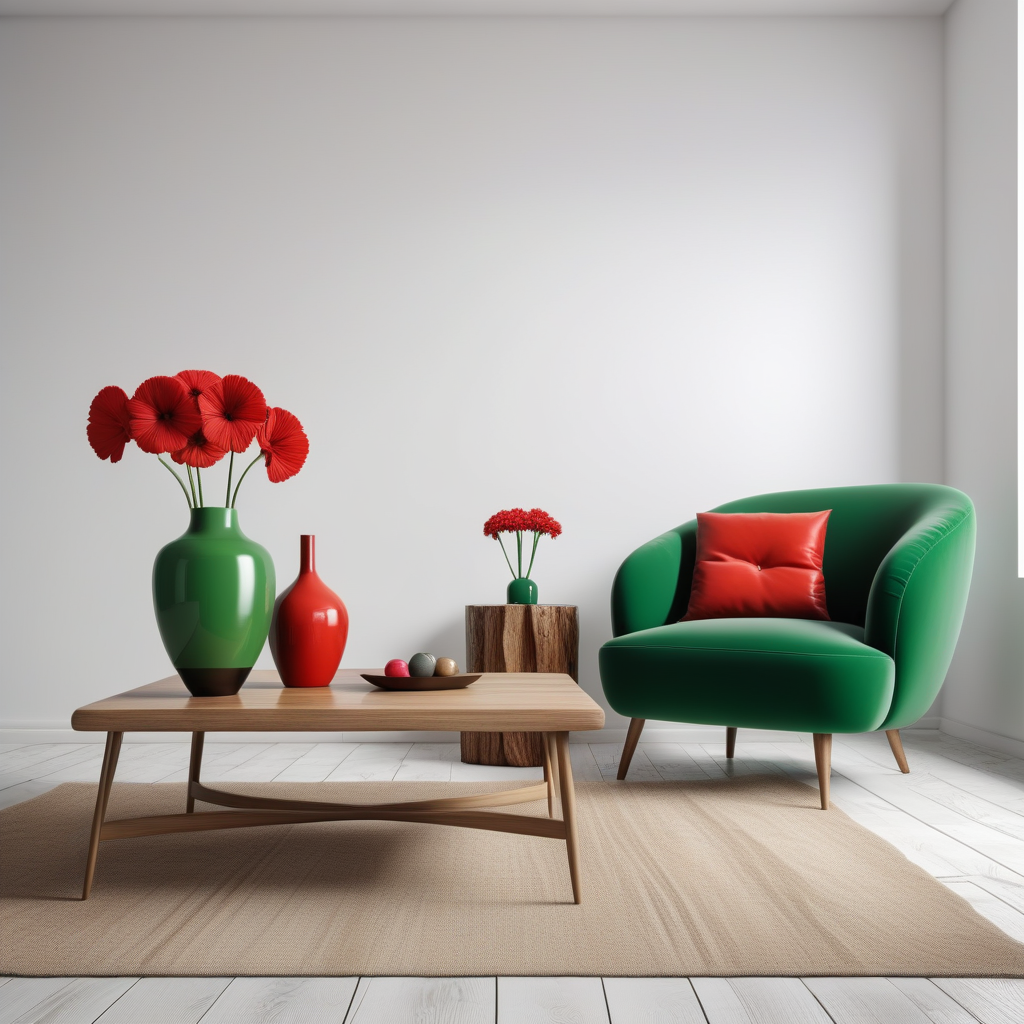

In [ ]:
import torch
from diffusers import DiffusionPipeline
import random
import os

model_id = "RunDiffusion/Juggernaut-XL-v9"

pipe = DiffusionPipeline.from_pretrained(
    "RunDiffusion/Juggernaut-XL-v9",
    torch_dtype=torch.float16,      # Use float16 for speed and memory efficiency
    variant="fp16",                 # Required for many SDXL custom models
    use_safetensors=True            # Safer model loading format
)

pipe = pipe.to("cuda")

Prompt = "A modern cozy living room with clean white walls, a stylish green armchair near a wooden coffee table, a vibrant red flower vase placed on the table, minimalistic decor, photorealistic"
negative_prompt = "dont include mugs, cups and a window"

seed = 12345
generator = torch.Generator(device="cuda").manual_seed(seed)

image = pipe(
    prompt=Prompt,
    negative_prompt=negative_prompt,
    generator=generator,
    num_inference_steps=30,  # Managing quality
    guidance_scale=7.5      # Read about this
).images[0]

output_path = "output{seed}.png"
image.save(output_path)

from IPython.display import Image, display
display(Image(filename=output_path))

# Day 5 Tasks


## Groq for **PROMPT ENGINEERING** **bold text**

In [ ]:
pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 5.4 MB/s eta 0:00:00


### Few-shot prompt

In [ ]:
import os
from groq import Groq
from google.colab import userdata

client = Groq(
    api_key=userdata.get("Groq_api_key")
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that writes professional emails based on the provided context."
        },
        # Few-shot example 1
        {
            "role": "user",
            "content": "Context: A follow-up email after a meeting with a potential client."
        },
        {
            "role": "assistant",
            "content": """Subject: Great Connecting With You Today

Hi [Client Name],

It was a pleasure speaking with you earlier. I enjoyed learning more about your goals for Q3 and how we might be able to support your team.

Attached is a brief summary of our discussion, along with a few next steps. Please don’t hesitate to reach out if any questions come up.

Looking forward to continuing the conversation.

Best regards,
[Your Name]"""
        },
        # Few-shot example 2
        {
            "role": "user",
            "content": "Context: Apology for a delay in project delivery."
        },
        {
            "role": "assistant",
            "content": """Subject: Update on Project Timeline

Hi [Client Name],

I wanted to reach out personally to apologize for the delay in delivering the latest project milestone. We encountered a few unforeseen issues that we’re actively resolving.

We’re now on track to deliver the updated version by [new date], and we’re taking additional steps to ensure this doesn’t happen again.

Thanks for your patience and understanding.

Sincerely,
[Your Name]"""
        },
        # New prompt (user input)
        {
            "role": "user",
            "content": "Context: Announcement of a new pricing plan for existing customers."
        }
    ],
    model="llama-3.3-70b-versatile"
)

print(chat_completion.choices[0].message.content)


Subject: Introducing Our New Pricing Plan: What You Need to Know

Dear Valued Customer,

We're excited to announce the launch of our new pricing plan, designed to better align with the evolving needs of our customers. This change aims to enhance the overall value proposition of our services while maintaining the high level of quality you've come to expect from us.

Key Highlights of the New Plan:

* Simplified tier structure for easier navigation
* Additional features and benefits to support your growing needs
* A phased implementation to ensure a smooth transition

The new pricing will take effect on [effective date]. If you have any questions or would like to discuss how this change affects your account, please don't hesitate to reach out. We're committed to supporting you through this transition.

You can find detailed information about the new pricing plan on our website or by contacting our dedicated customer support team.

Thank you for your continued loyalty and trust in our ser

In [ ]:
import os
from groq import Groq
from google.colab import userdata

client = Groq(
    api_key=userdata.get("Groq_api_key")
)

chat_completion = client.chat.completions.create(
    messages =[
    {
        "role": "system",
        "content": (
            "You are an expert assistant capable of answering questions in multiple styles. "
            "When asked a question, respond first in Shakespearean English, and then in technical prose. "
            "Label each section clearly with 'Shakespearean Style:' and 'Technical Prose:'."
        )
    },
    {
        "role": "user",
        "content": "What is the probability of getting a six when rolling a fair six-sided die?"
    }
],
    model="llama-3.3-70b-versatile"
)

print(chat_completion.choices[0].message.content)


**Shakespearean Style:**
O, fair query, thou seekest to know the chance of rolling a six upon a die most fair and just. 'Tis but a simple calculation, good sir. Forsooth, there are six sides to this die, and but one of them doth bear the number six. Thus, the probability of rolling a six is but one in six, a fraction most plain and true. To wit, 'tis one-sixth, or approximately 0.167, a likelihood most modest and unassuming.

**Technical Prose:**
The probability of obtaining a six when rolling a fair six-sided die can be calculated by dividing the number of favorable outcomes (rolling a six) by the total number of possible outcomes (six sides). Since there is only one side with the number six, the probability is 1/6 or approximately 0.167. This value represents the likelihood of rolling a six and can be expressed as a decimal or a fraction. The fairness of the die ensures that each side has an equal probability of landing face up, resulting in a uniform distribution of outcomes. Theref

In [ ]:
import os
from groq import Groq
from google.colab import userdata

client = Groq(api_key=userdata.get("Groq_api_key"))

system_prompt = {
    "role": "system",
    "content": (
        "You are an assistant that answers questions strictly in the following JSON format:\n\n"
        "{\n"
        '  "question": "The original question here",\n'
        '  "answer": "The answer here",\n'
        '  "sources": ["source1", "source2"]\n'
        "}\n\n"
        "Respond only with valid JSON. Do not include explanations, markdown, or commentary outside the JSON object."
    )
}

test_queries = [
    "What is the capital of Japan?",
    "How many moons does Mars have?",
    "Who wrote 'Pride and Prejudice'?"
]

for query in test_queries:
    response = client.chat.completions.create(
        model="llama-3.3-70b-versatile",
        messages=[
            system_prompt,
            {"role": "user", "content": query}
        ]
    )
    print(response.choices[0].message.content)
    print("\n---\n")


{
  "question": "What is the capital of Japan?",
  "answer": "Tokyo",
  "sources": ["CIA World Factbook", "Japanese Government Official Website"]
}

---

{
  "question": "How many moons does Mars have?",
  "answer": "Mars has two moons, Phobos and Deimos",
  "sources": ["NASA", "Wikipedia"]
}

---

{
  "question": "Who wrote 'Pride and Prejudice'?",
  "answer": "Jane Austen",
  "sources": ["literary history", "British Library"]
}

---

